# Comparative Study of Different Machine Learning Algorithms on P2P Loan Lending Organization’s Dataset to Predict the Loan Defaulters

## Importing the required libraries

In [1]:
import pandas as pd
import numpy as np


import catboost 
import xgboost
import optuna

from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
import lightgbm as lgb
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# Stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
import matplotlib.pyplot as plt 

# Misc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.metrics import plot_confusion_matrix

import sklearn
#tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC

pd.set_option('display.max_columns', None)

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore")

#plotting
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import re

In [2]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100

sns.set(rc={"figure.dpi":100, 'savefig.dpi':100})
sns.set_context('notebook')
sns.set_style("ticks")

In [3]:
data = pd.read_csv('data_completely_cleaned.csv', low_memory=False)
pd.set_option('display.max_columns', None)

In [4]:
data 

,Unnamed: 0,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,Amount,Interest,MonthlyPayment,IncomeFromPrincipalEmployer,IncomeFromPension,IncomeFromFamilyAllowance,IncomeFromSocialWelfare,IncomeFromLeavePay,IncomeFromChildSupport,IncomeOther,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,ActiveScheduleFirstPaymentReached,PlannedInterestTillDate,Restructured,PrincipalPaymentsMade,PrincipalBalance,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,NrOfScheduledPayments,IsDefault,ApplicationSignedHour_1,ApplicationSignedHour_2,ApplicationSignedHour_3,ApplicationSignedHour_4,ApplicationSignedHour_5,ApplicationSignedHour_6,ApplicationSignedHour_7,ApplicationSignedHour_8,ApplicationSignedHour_9,ApplicationSignedHour_10,ApplicationSignedHour_11,ApplicationSignedHour_12,ApplicationSignedHour_13,ApplicationSignedHour_14,ApplicationSignedHour_15,ApplicationSignedHour_16,ApplicationSignedHour_17,ApplicationSignedHour_18,ApplicationSignedHour_19,ApplicationSignedHour_20,ApplicationSignedHour_21,ApplicationSignedHour_22,ApplicationSignedHour_23,ApplicationSignedWeekday_2,ApplicationSignedWeekday_3,ApplicationSignedWeekday_4,ApplicationSignedWeekday_5,ApplicationSignedWeekday_6,ApplicationSignedWeekday_7,VerificationType_20,VerificationType_30,VerificationType_40,LanguageCode_2,LanguageCode_3,LanguageCode_4,LanguageCode_5,LanguageCode_6,LanguageCode_7,LanguageCode_9,LanguageCode_10,LanguageCode_13,LanguageCode_15,LanguageCode_21,LanguageCode_22,Gender_10,Gender_20,Country_ES,Country_FI,Country_SK,LoanDuration_2,LoanDuration_3,LoanDuration_4,LoanDuration_5,LoanDuration_6,LoanDuration_7,LoanDuration_8,LoanDuration_9,LoanDuration_10,LoanDuration_11,LoanDuration_12,LoanDuration_13,LoanDuration_14,LoanDuration_15,LoanDuration_16,LoanDuration_17,LoanDuration_18,LoanDuration_19,LoanDuration_20,LoanDuration_21,LoanDuration_22,LoanDuration_24,LoanDuration_27,LoanDuration_30,LoanDuration_36,LoanDuration_38,LoanDuration_42,LoanDuration_48,LoanDuration_52,LoanDuration_54,LoanDuration_60,UseOfLoan_1,UseOfLoan_2,UseOfLoan_3,UseOfLoan_4,UseOfLoan_5,UseOfLoan_6,UseOfLoan_7,UseOfLoan_8,Education_20,Education_30,Education_40,Education_50,MaritalStatus_20,MaritalStatus_30,MaritalStatus_40,MaritalStatus_50,EmploymentStatus_20,EmploymentStatus_30,EmploymentStatus_40,EmploymentStatus_50,EmploymentStatus_60,EmploymentDurationCurrentEmployer_Other,EmploymentDurationCurrentEmployer_Retiree,EmploymentDurationCurrentEmployer_TrialPeriod,EmploymentDurationCurrentEmployer_UpTo1Year,EmploymentDurationCurrentEmployer_UpTo2Years,EmploymentDurationCurrentEmployer_UpTo3Years,EmploymentDurationCurrentEmployer_UpTo4Years,EmploymentDurationCurrentEmployer_UpTo5Years,OccupationArea_20,OccupationArea_30,OccupationArea_40,OccupationArea_50,OccupationArea_60,OccupationArea_70,OccupationArea_80,OccupationArea_90,OccupationArea_100,OccupationArea_110,OccupationArea_120,OccupationArea_130,OccupationArea_140,OccupationArea_150,OccupationArea_160,OccupationArea_170,OccupationArea_180,OccupationArea_190,HomeOwnershipType_10,HomeOwnershipType_20,HomeOwnershipType_30,HomeOwnershipType_40,HomeOwnershipType_50,HomeOwnershipType_60,HomeOwnershipType_70,HomeOwnershipType_80,HomeOwnershipType_90,HomeOwnershipType_100,Rating_AA,Rating_B,Rating_C,Rating_D,Rating_E,Rating_F,Rating_HR,Status_Repaid,CreditScoreEeMini_5000,CreditScoreEeMini_6000,CreditScoreEeMini_7000,CreditScoreEeMini_8000,CreditScoreEeMini_9000,CreditScoreEeMini_10000,PreviousEarlyRepaymentsCountBeforeLoan_1,PreviousEarlyRepaymentsCountBeforeLoan_2,PreviousEarlyRepaymentsCountBeforeLoan_3,PreviousEarlyRepaymentsCountBeforeLoan_4,PreviousEarlyRepaymentsCountBeforeLoan_5,PreviousEarlyRepaymentsCountBeforeLoan_6,PreviousEarlyRepaymentsCountBeforeLoan_7,PreviousEarlyRepaymentsCountBeforeLoan_8,PreviousEarlyRepaymentsCountBeforeLoan_9,PreviousEarlyRepaymentsCountBeforeLoan_11,ActiveLateLastPaymentCategory_121150,ActiveLateLastPaymentCategory_151180,ActiveLateLastPaymentCat

In [5]:
data = data.drop(columns = 'Unnamed: 0', axis = 1) 

In [6]:
sorted(data.columns)

['ActiveLateLastPaymentCategory_121150',
 'ActiveLateLastPaymentCategory_151180',
 'ActiveLateLastPaymentCategory_1630',
 'ActiveLateLastPaymentCategory_180',
 'ActiveLateLastPaymentCategory_3160',
 'ActiveLateLastPaymentCategory_6190',
 'ActiveLateLastPaymentCategory_815',
 'ActiveLateLastPaymentCategory_91120',
 'ActiveScheduleFirstPaymentReached',
 'Age_range__2025',
 'Age_range__2530',
 'Age_range__3035',
 'Age_range__3540',
 'Age_range__4045',
 'Age_range__4550',
 'Age_range__5055',
 'Age_range__5560',
 'Age_range__6065',
 'Age_range__6570',
 'Age_range__7075',
 'Age_range__7580',
 'Amount',
 'AmountOfPreviousLoansBeforeLoan',
 'ApplicationSignedHour_1',
 'ApplicationSignedHour_10',
 'ApplicationSignedHour_11',
 'ApplicationSignedHour_12',
 'ApplicationSignedHour_13',
 'ApplicationSignedHour_14',
 'ApplicationSignedHour_15',
 'ApplicationSignedHour_16',
 'ApplicationSignedHour_17',
 'ApplicationSignedHour_18',
 'ApplicationSignedHour_19',
 'ApplicationSignedHour_2',
 'ApplicationS

## Train_test_split

In [7]:
all_columns = data.columns

In [8]:
X = data.drop(columns = 'IsDefault', axis = 1)
y = data['IsDefault']

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

In [10]:


# rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=50)
# rfe = rfe.fit(X, y)

# for i in range(X.shape[1]):
#     print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2021)

In [13]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((81199, 296), (34800, 296), (81199,), (34800,))

In [14]:
# from imblearn.over_sampling import SMOTE

# # Separate input features and target
# # y = df.Class
# # X = df.drop('Class', axis=1)

# # # setting up testing and training sets
# # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

# sm = SMOTE(random_state=27, sampling_strategy=1)
# X_train, y_train = sm.fit_sample(X_train, y_train)

In [15]:
from sklearn.utils import resample

# Separate input features and target


# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)


# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)
X.shape



(86999, 297)

In [16]:
# separate minority and majority classes
not_default = X[X.IsDefault==0]
default = X[X.IsDefault==1]

# upsample minority
not_default_upsampled = resample(not_default,
                          replace=True, # sample with replacement
                          n_samples=len(default), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([default, not_default_upsampled])

# check new class counts
upsampled.IsDefault.value_counts()
#     1    213245
#     0    213245

1    51700
0    51700
Name: IsDefault, dtype: int64

## Predictive Modelling

### Logistic Regression


#### Modelling


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

model_LR = LogisticRegression().fit(X_train, y_train)

In [18]:
y_pred_LR = model_LR.predict(X_test)
#y_pred_LR1 = model_LR.predict(X_train)
LR_confusion_matrix = confusion_matrix(y_test, y_pred_LR).ravel()
LR_confusion_matrix #tn, fp, fn, tp

array([10540,  1353,  1287, 15820], dtype=int64)

#### Evaluation Metrics

In [19]:
metric_LR = {}
metric_LR['model_name'] = 'Logistic Regression'
metric_LR['TN'] = LR_confusion_matrix[0]
metric_LR['FP'] = LR_confusion_matrix[1]
metric_LR['FN'] = LR_confusion_matrix[2]
metric_LR['TP'] = LR_confusion_matrix[3]

metric_LR['model'] = model_LR

In [20]:
metric_LR

{'model_name': 'Logistic Regression',
 'TN': 10540,
 'FP': 1353,
 'FN': 1287,
 'TP': 15820,
 'model': LogisticRegression()}

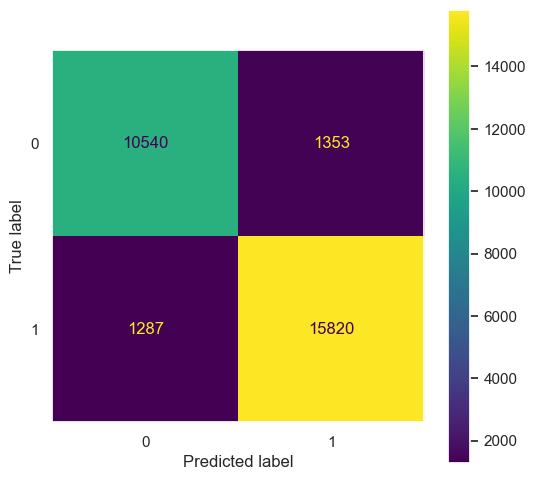

In [21]:
sns.set(rc={'figure.figsize':(6,6)})
import matplotlib.pyplot as plt
plot_confusion_matrix(model_LR, X_test, y_test) 
plt.grid(False)
plt.show()  

##### Accuracy

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_LR)

0.9089655172413793

##### Misclassification Rate

In [23]:
from sklearn.metrics import classification_report
print("Classification Report: \n", classification_report(y_test, y_pred_LR))  

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.89      0.89     11893
           1       0.92      0.92      0.92     17107

    accuracy                           0.91     29000
   macro avg       0.91      0.91      0.91     29000
weighted avg       0.91      0.91      0.91     29000



##### Sensitivity

##### Specificity

##### F1 Score

##### ROC and AUC – Area Under the Curve

In [24]:
from sklearn import metrics
y_pred_proba = model_LR.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

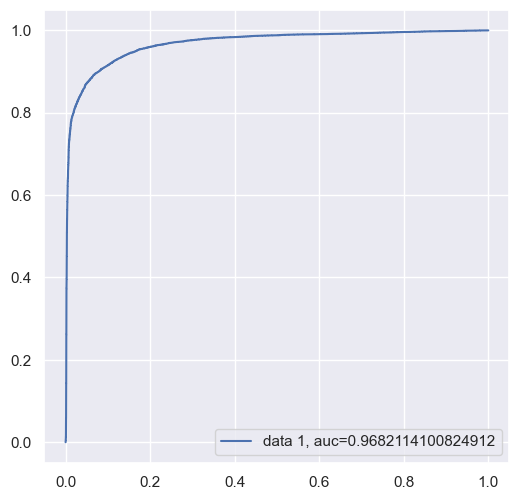

In [25]:
import matplotlib.pyplot as plt 
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [26]:
##### ROC and AUC – Area Under the Curve

### Decision Trees

#### Modelling


In [27]:
from sklearn.tree import DecisionTreeClassifier
model_DT = DecisionTreeClassifier()

model_DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [28]:
y_pred_DT = model_DT.predict(X_test)

In [29]:
DT_confusion_matrix = confusion_matrix(y_test, y_pred_DT).ravel()
DT_confusion_matrix

array([10484,  1409,  1233, 15874], dtype=int64)

#### Evaluation Metrics

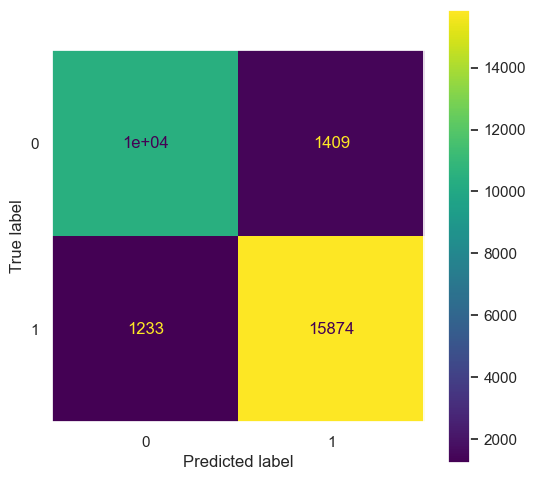

In [30]:
import matplotlib.pyplot as plt
plot_confusion_matrix(model_DT, X_test, y_test)  
plt.grid(False)
plt.show()  

In [31]:
metric_DT = {}
metric_DT['model_name'] = 'Decision Trees'
metric_DT['TN'] = DT_confusion_matrix[0]
metric_DT['FP'] = DT_confusion_matrix[1]
metric_DT['FN'] = DT_confusion_matrix[2]
metric_DT['TP'] = DT_confusion_matrix[3]

metric_DT['model'] = model_DT

In [32]:
metric_DT

{'model_name': 'Decision Trees',
 'TN': 10484,
 'FP': 1409,
 'FN': 1233,
 'TP': 15874,
 'model': DecisionTreeClassifier()}

##### Accuracy

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_DT)

0.908896551724138

##### Misclassification Rate

In [34]:
from sklearn.metrics import classification_report
print("Classification Report: \n", classification_report(y_test, y_pred_DT))  

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.88      0.89     11893
           1       0.92      0.93      0.92     17107

    accuracy                           0.91     29000
   macro avg       0.91      0.90      0.91     29000
weighted avg       0.91      0.91      0.91     29000



##### Sensitivity

##### Specificity

##### F1 Score

##### ROC and AUC – Area Under the Curve

In [35]:
from sklearn import metrics
y_pred_proba = model_DT.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

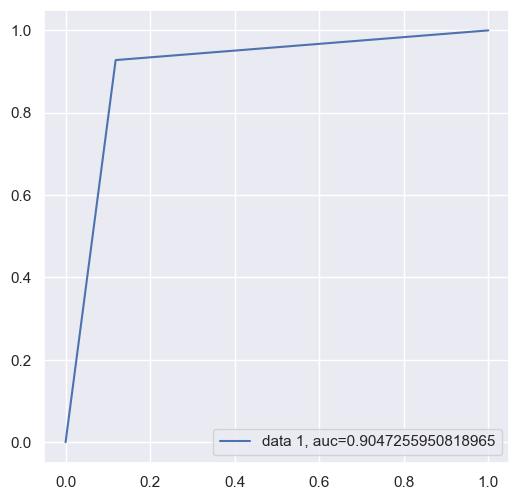

In [36]:
import matplotlib.pyplot as plt 
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### Hyper-parameter Tuning

In [37]:
model_DT.get_params() 

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

##### RandomizedSearchCV

In [38]:
from sklearn.model_selection import RandomizedSearchCV

In [39]:

# Number of trees in random forest
#n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
#bootstrap = [True, False]
# Create the random grid
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
#'n_estimators': n_estimators,
#'bootstrap': bootstrap
# pprint(random_grid)
# {'bootstrap': [True, False],
#  'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
#  'max_features': ['auto', 'sqrt'],
#  'min_samples_leaf': [1, 2, 4],
#  'min_samples_split': [2, 5, 10],
#  'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [40]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
model_DT_RSCV = DecisionTreeClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
model_DT_random = RandomizedSearchCV(estimator = model_DT_RSCV, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
model_DT_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:   38.6s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.3min finished


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]},
                   random_state=42, verbose=2)

In [41]:
y_pred_RSCV_DT = model_DT_random.predict(X_test)

In [42]:
RSCV_DT_confusion_matrix = confusion_matrix(y_test, y_pred_RSCV_DT).ravel()
RSCV_DT_confusion_matrix

array([10188,  1705,  2142, 14965], dtype=int64)

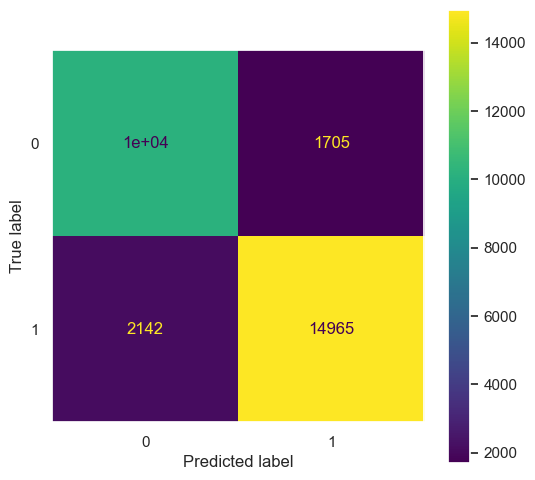

In [43]:
plot_confusion_matrix(model_DT_random, X_test, y_test)  
plt.grid(False)
plt.show() 

In [44]:

accuracy_score(y_test, y_pred_RSCV_DT)

0.8673448275862069

In [45]:

print("Classification Report: \n", classification_report(y_test, y_pred_RSCV_DT)) 

Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.86      0.84     11893
           1       0.90      0.87      0.89     17107

    accuracy                           0.87     29000
   macro avg       0.86      0.87      0.86     29000
weighted avg       0.87      0.87      0.87     29000



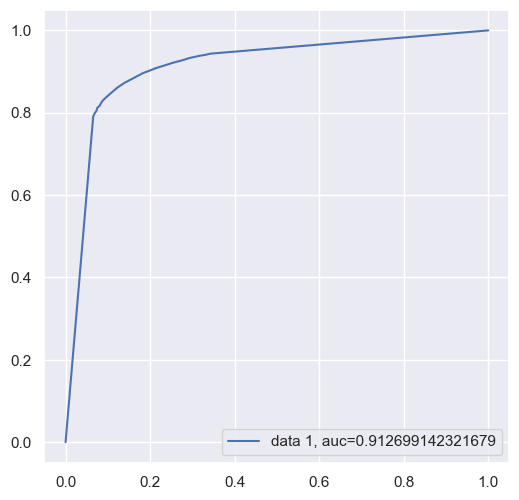

In [46]:
from sklearn import metrics
y_pred_proba = model_DT_random.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

import matplotlib.pyplot as plt 
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Random Forest

#### Modelling


In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
model_RF = RandomForestClassifier(max_depth=2)

In [49]:
model_RF.fit(X_train, y_train)

RandomForestClassifier(max_depth=2)

In [50]:
y_pred_RF = model_RF.predict(X_test)

In [51]:
RF_confusion_matrix = confusion_matrix(y_test, y_pred_RF).ravel()
RF_confusion_matrix

array([ 7937,  3956,  1056, 16051], dtype=int64)

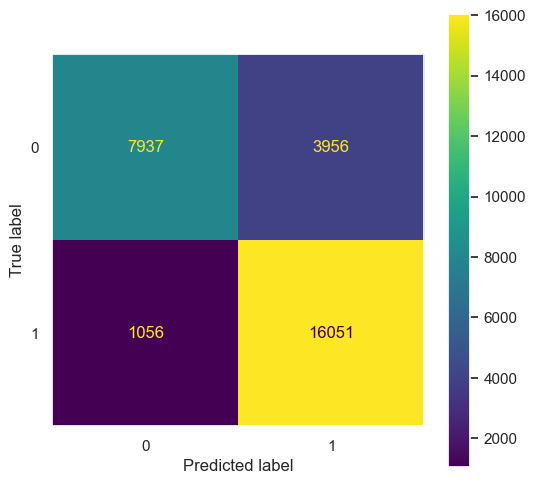

In [52]:
plot_confusion_matrix(model_RF, X_test, y_test)  
plt.grid(False)
plt.show() 

#### Evaluation Metrics

In [53]:
metric_RF = {}
metric_RF['model_name'] = 'Random Forest'
metric_RF['TN'] = RF_confusion_matrix[0]
metric_RF['FP'] = RF_confusion_matrix[1]
metric_RF['FN'] = RF_confusion_matrix[2]
metric_RF['TP'] = RF_confusion_matrix[3]

metric_RF['model'] = model_RF

##### Accuracy

In [54]:

accuracy_score(y_test, y_pred_RF)

0.8271724137931035

##### Misclassification Rate

In [55]:

print("Classification Report: \n", classification_report(y_test, y_pred_RF)) 

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.67      0.76     11893
           1       0.80      0.94      0.86     17107

    accuracy                           0.83     29000
   macro avg       0.84      0.80      0.81     29000
weighted avg       0.84      0.83      0.82     29000



##### Sensitivity

##### Specificity

##### F1 Score

##### ROC and AUC – Area Under the Curve

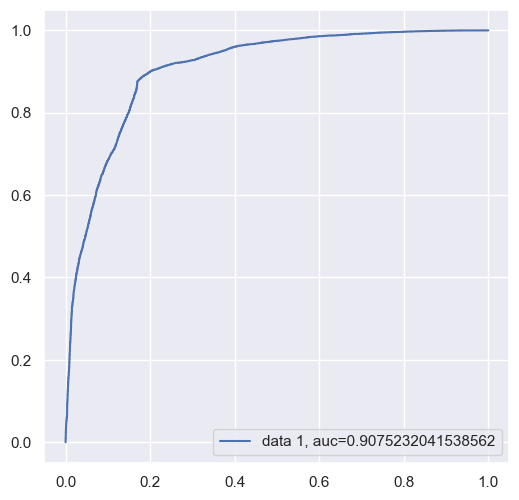

In [56]:
from sklearn import metrics
y_pred_proba = model_RF.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

import matplotlib.pyplot as plt 
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### Hyper-parameter Tuning

In [57]:
model_RF.get_params()  

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [58]:

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 20]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 8]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid1 = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
#'n_estimators': n_estimators,
#'bootstrap': bootstrap
# pprint(random_grid)
# {'bootstrap': [True, False],
#  'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
#  'max_features': ['auto', 'sqrt'],
#  'min_samples_leaf': [1, 2, 4],
#  'min_samples_split': [2, 5, 10],
#  'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [61]:
import gc

In [62]:
gc.collect() 

2642

In [64]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
model_RF_RSCV = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
model_RF_random = RandomizedSearchCV(estimator = model_RF_RSCV, param_distributions = random_grid1, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = 12)
# Fit the random search model
model_RF_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed: 15.2min
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed: 85.9min
[Parallel(n_jobs=12)]: Done 300 out of 300 | elapsed: 162.7min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=12,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 8],
                                        'min_samples_split': [2, 5, 10, 20],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [65]:
y_pred_RSCV_RF = model_RF_random.predict(X_test)

In [66]:
RSCV_RF_confusion_matrix = confusion_matrix(y_test, y_pred_RSCV_RF).ravel()
RSCV_RF_confusion_matrix

array([10859,  1034,  1235, 15872], dtype=int64)

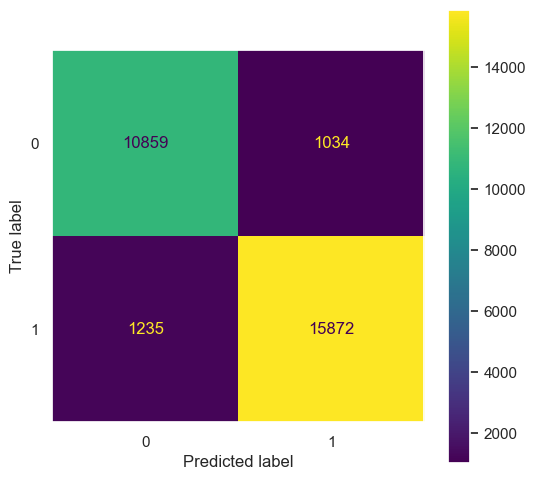

In [67]:
plot_confusion_matrix(model_RF_random, X_test, y_test)  
plt.grid(False)
plt.show() 

In [68]:

accuracy_score(y_test, y_pred_RSCV_RF)

0.9217586206896552

In [69]:

print("Classification Report: \n", classification_report(y_test, y_pred_RSCV_RF)) 

Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.91      0.91     11893
           1       0.94      0.93      0.93     17107

    accuracy                           0.92     29000
   macro avg       0.92      0.92      0.92     29000
weighted avg       0.92      0.92      0.92     29000



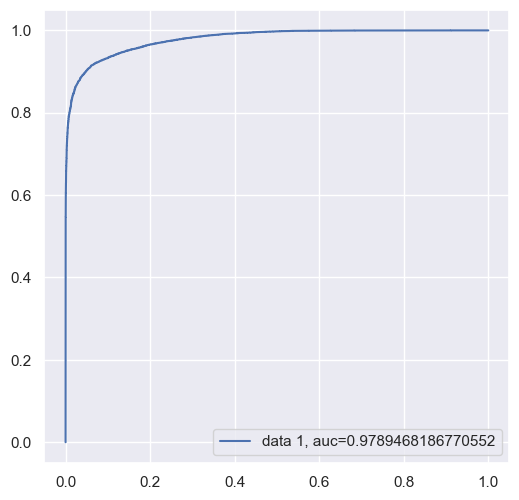

In [70]:
from sklearn import metrics
y_pred_proba = model_RF_random.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

import matplotlib.pyplot as plt 
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Support Vector Machine

#### Modelling


In [71]:
from sklearn import svm


In [72]:
model_SVC = svm.SVC()
model_SVC.fit(X_train, y_train)


SVC()

In [73]:
y_pred_SVC = model_SVC.predict(X_test)

In [74]:
SVC_confusion_matrix = confusion_matrix(y_test, y_pred_SVC).ravel()
SVC_confusion_matrix

array([10746,  1147,  1448, 15659], dtype=int64)

In [75]:
#### Evaluation Metrics

In [76]:
metric_SVC = {}
metric_SVC['model_name'] = 'Support Vector Classifier'
metric_SVC['TN'] = SVC_confusion_matrix[0]
metric_SVC['FP'] = SVC_confusion_matrix[1]
metric_SVC['FN'] = SVC_confusion_matrix[2]
metric_SVC['TP'] = SVC_confusion_matrix[3]

metric_SVC['model'] = model_SVC

In [77]:
metric_SVC

{'model_name': 'Support Vector Classifier',
 'TN': 10746,
 'FP': 1147,
 'FN': 1448,
 'TP': 15659,
 'model': SVC()}

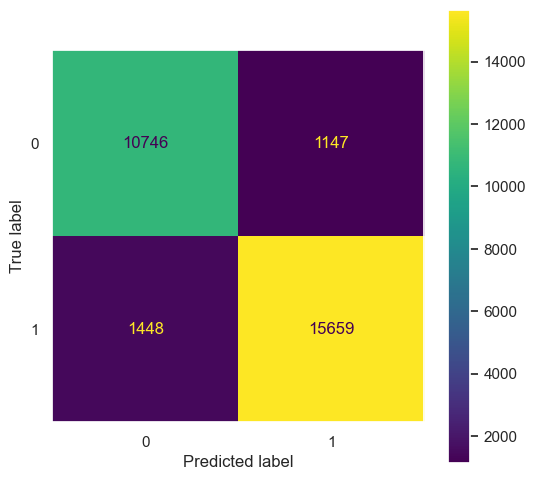

In [78]:
plot_confusion_matrix(model_SVC, X_test, y_test)  
plt.grid(False)
plt.show()  

In [79]:
accuracy_score(y_test, y_pred_SVC)

0.9105172413793103

##### Accuracy

##### Misclassification Rate

In [80]:
print("Classification Report: \n", classification_report(y_test, y_pred_SVC))  

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.90      0.89     11893
           1       0.93      0.92      0.92     17107

    accuracy                           0.91     29000
   macro avg       0.91      0.91      0.91     29000
weighted avg       0.91      0.91      0.91     29000



##### Sensitivity

##### Specificity

##### F1 Score

##### ROC and AUC – Area Under the Curve

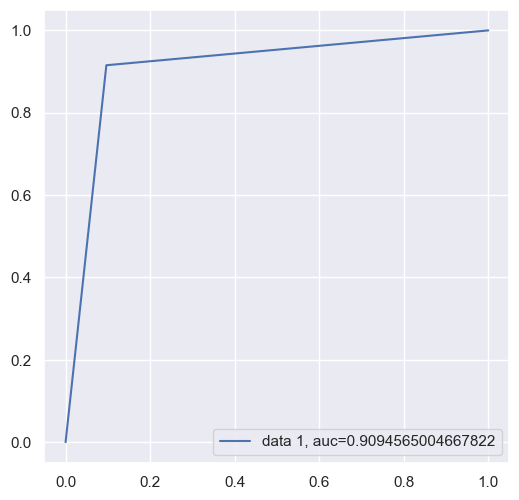

In [90]:
y_pred_proba = model_SVC.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)


plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### Hyper-parameter Tuning

### XGBoost

#### Modelling


In [92]:
len(X_train.columns) 

296

In [94]:
duplicate_columns = data.columns[data.columns.duplicated()] 

In [96]:
duplicate_columns 

Index([], dtype='object')

In [98]:
import xgboost as xgb 
from numpy import loadtxt
from xgboost import plot_importance


# fit model no training data
model_xgb = xgb.XGBClassifier()
model_xgb.fit(X_train, y_train)

[14:14:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [105]:
y_pred_xgb = model_xgb.predict(X_test)

In [106]:
xgb_confusion_matrix = confusion_matrix(y_test, y_pred_xgb).ravel()
xgb_confusion_matrix

array([11249,   644,   821, 16286], dtype=int64)

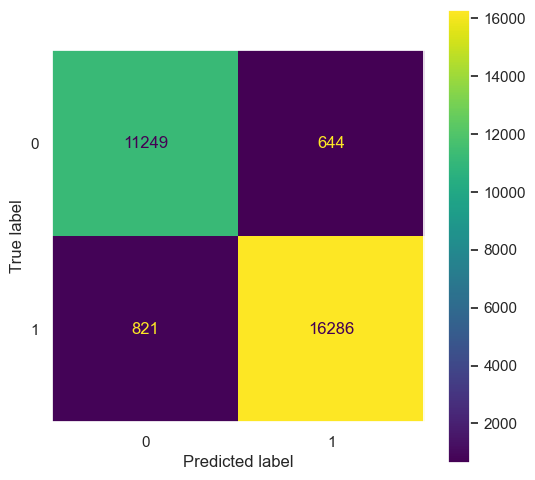

In [107]:
plot_confusion_matrix(model_xgb, X_test, y_test)  
plt.grid(False)
plt.show()  

#### Evaluation Metrics

In [108]:
metric_xgb = {}
metric_xgb['model_name'] = 'XGB Classifier'
metric_xgb['TN'] = xgb_confusion_matrix[0]
metric_xgb['FP'] = xgb_confusion_matrix[1]
metric_xgb['FN'] = xgb_confusion_matrix[2]
metric_xgb['TP'] = xgb_confusion_matrix[3]

metric_xgb['model'] = model_xgb

In [109]:
metric_xgb

{'model_name': 'XGB Classifier',
 'TN': 11249,
 'FP': 644,
 'FN': 821,
 'TP': 16286,
 'model': XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.300000012, max_delta_step=0, max_depth=6,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
               tree_method='exact', validate_parameters=1, verbosity=None)}

In [110]:
# results = model_xgb.evals_result()

##### Accuracy

In [111]:
accuracy_score(y_test, y_pred_xgb)

0.9494827586206896

##### Misclassification Rate

In [112]:
print("Classification Report: \n", classification_report(y_test, y_pred_xgb))  

Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.95      0.94     11893
           1       0.96      0.95      0.96     17107

    accuracy                           0.95     29000
   macro avg       0.95      0.95      0.95     29000
weighted avg       0.95      0.95      0.95     29000



##### Sensitivity

##### Specificity

##### F1 Score

##### ROC and AUC – Area Under the Curve

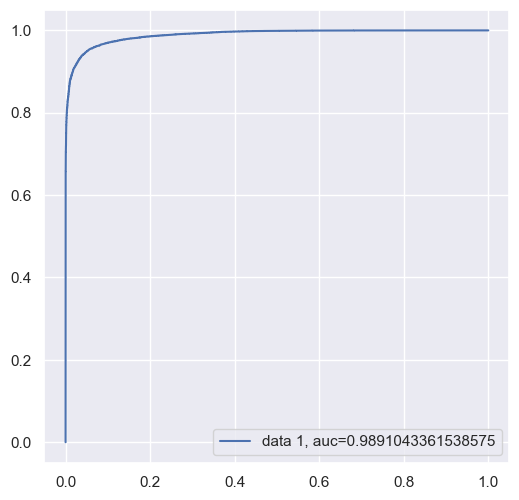

In [113]:

y_pred_proba = model_xgb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)


plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

##### plot_importance() Graph

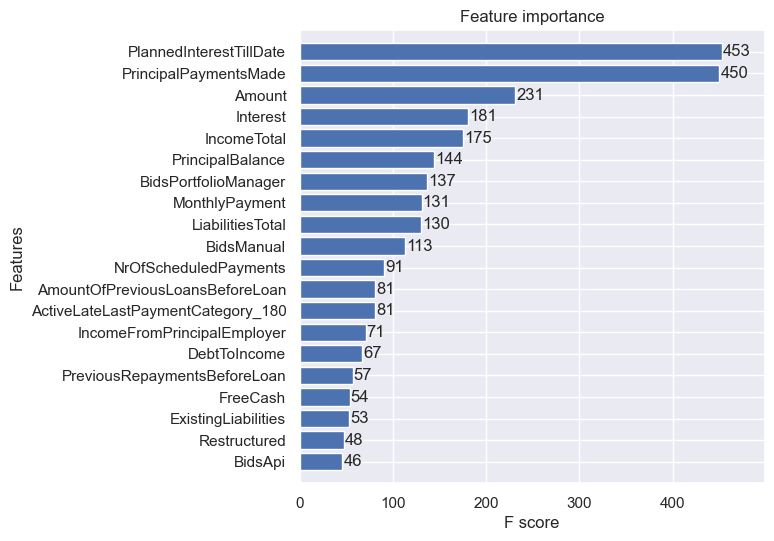

In [114]:
from matplotlib import pyplot
plot_importance(model_xgb, max_num_features=20, height=0.8)
pyplot.show()

#### Hyper-parameter Tuning

In [115]:
model_xgb.get_xgb_params() 

{'objective': 'binary:logistic',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'gpu_id': -1,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'monotone_constraints': '()',
 'n_jobs': 16,
 'num_parallel_tree': 1,
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [116]:
model_xgb.get_params()  

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': 'gain',
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 16,
 'num_parallel_tree': 1,
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [117]:
from scipy import stats
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,roc_auc_score

In [ ]:


model_xgb_RSCV = xgb.XGBClassifier(objective = 'binary:logistic')
param_dist = {'n_estimators': stats.randint(150, 1000),
              'learning_rate': stats.uniform(0.01, 0.6),
              'subsample': stats.uniform(0.3, 0.9),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': stats.uniform(0.5, 0.9),
              'min_child_weight': [1, 2, 3, 4]
             }
model_XGB_random = RandomizedSearchCV(model_xgb_RSCV, param_distributions = param_dist, n_iter = 25, scoring = 'roc_auc', error_score = 0, verbose = 3, n_jobs = -1)


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
#model_DT_RSCV = DecisionTreeClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
#model_DT_random = RandomizedSearchCV(estimator = model_DT_RSCV, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
model_XGB_random.fit(X_train, y_train)

In [ ]:
y_pred_RSCV_Xgb = model_XGB_random.predict(X_test)

In [ ]:
RSCV_Xgb_confusion_matrix = confusion_matrix(y_test, y_pred_RSCV_Xgb).ravel()
RSCV_Xgb_confusion_matrix

In [ ]:
plot_confusion_matrix(model_XGB_random, X_test, y_test)  
plt.grid(False)
plt.show() 

In [ ]:

accuracy_score(y_test, y_pred_RSCV_Xgb)

In [ ]:

print("Classification Report: \n", classification_report(y_test, y_pred_RSCV_Xgb)) 

In [ ]:
from sklearn import metrics
y_pred_proba = model_XGB_random.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

import matplotlib.pyplot as plt 
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### LightGBM

#### Modelling


In [ ]:
import lightgbm as lgbm

In [ ]:
model_lgbm = lgbm.LGBMClassifier()
model_lgbm.fit(X_train, y_train)

In [ ]:
y_pred_lgbm = model_lgbm.predict(X_test)

In [ ]:
lgbm_confusion_matrix = confusion_matrix(y_test, y_pred_lgbm).ravel()
lgbm_confusion_matrix

In [ ]:
plot_confusion_matrix(model_lgbm, X_test, y_test) 
plt.grid(False)
plt.show()  

#### Evaluation Metrics

In [ ]:
metric_lgbm = {}
metric_lgbm['model_name'] = 'LGBM Classifier'
metric_lgbm['TN'] = lgbm_confusion_matrix[0]
metric_lgbm['FP'] = lgbm_confusion_matrix[1]
metric_lgbm['FN'] = lgbm_confusion_matrix[2]
metric_lgbm['TP'] = lgbm_confusion_matrix[3]

metric_lgbm['model'] = model_lgbm

In [ ]:
metric_lgbm

##### Accuracy

In [ ]:
accuracy_score(y_test, y_pred_lgbm)

##### Misclassification Rate

In [ ]:
print("Classification Report: \n", classification_report(y_test, y_pred_lgbm))  

##### Sensitivity

##### Specificity

##### F1 Score

##### ROC and AUC – Area Under the Curve

In [ ]:
y_pred_proba = model_lgbm.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

import matplotlib.pyplot as plt 
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### Hyper-parameter Tuning

In [ ]:
# params = {} #initialize parameters
# params['learning_rate'] = np.random.uniform(0, 1)
# params['boosting_type'] = np.random.choice(['gbdt', 'dart', 'goss'])
# params['objective'] = 'regression'
# params['metric'] = 'mae'
# params['sub_feature'] = np.random.uniform(0, 1)
# params['num_leaves'] = np.random.randint(20, 300)
# params['min_data'] = np.random.randint(10, 100)
# params['max_depth'] = np.random.randint(5, 200)
# iterations = np.random.randint(10, 10000)
# print(params, iterations)

In [ ]:

# # Number of trees in random forest
# #n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# #bootstrap = [True, False]
# # Create the random grid
# random_grid = {'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf}
#'n_estimators': n_estimators,
#'bootstrap': bootstrap
# pprint(random_grid)
# {'bootstrap': [True, False],
#  'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
#  'max_features': ['auto', 'sqrt'],
#  'min_samples_leaf': [1, 2, 4],
#  'min_samples_split': [2, 5, 10],
#  'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [ ]:
model_lgbm.get_params()  

In [ ]:

param_dist2 = {'n_estimators': stats.randint(150, 1000),
              'learning_rate': stats.uniform(0.01, 0.6),
              'subsample': stats.uniform(0.3, 0.9),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': stats.uniform(0.5, 0.9),
              'min_child_weight': [1, 2, 3, 4]
             }
#model_XGB_random = RandomizedSearchCV(model_xgb_RSCV, param_distributions = param_dist2, n_iter = 25, scoring = 'roc_auc', error_score = 0, verbose = 3, n_jobs = -1)


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
model_lgbm_RSCV = lgb.LGBMClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
model_lgbm_random = RandomizedSearchCV(model_xgb_RSCV, param_distributions = param_dist2, n_iter = 25, scoring = 'roc_auc', error_score = 0, verbose = 3, n_jobs = -1)
# Fit the random search model
model_lgbm_random.fit(X_train, y_train)

In [ ]:
y_pred_RSCV_lgbm = model_lgbm_random.predict(X_test)

In [ ]:
RSCV_lgbm_confusion_matrix = confusion_matrix(y_test, y_pred_RSCV_lgbm).ravel()
RSCV_lgbm_confusion_matrix

In [ ]:
plot_confusion_matrix(model_lgbm_random, X_test, y_test)  
plt.grid(False)
plt.show() 

In [ ]:

accuracy_score(y_test, y_pred_RSCV_lgbm)

In [ ]:

print("Classification Report: \n", classification_report(y_test, y_pred_RSCV_lgbm)) 

In [ ]:
from sklearn import metrics
y_pred_proba = model_lgbm_random.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

import matplotlib.pyplot as plt 
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### CatBoost

#### Modelling


In [ ]:
import catboost as cb

In [ ]:
model_cb = cb.CatBoostClassifier()
model_cb.fit(X_train, y_train)

In [ ]:
y_pred_cb = model_cb.predict(X_test)

In [ ]:
cb_confusion_matrix = confusion_matrix(y_test, y_pred_cb).ravel()
cb_confusion_matrix

In [ ]:
plot_confusion_matrix(model_cb, X_test, y_test)  
plt.grid(False)
plt.show()  

#### Evaluation Metrics

In [ ]:
metric_cb = {}
metric_cb['model_name'] = 'CatBoost Classifier'
metric_cb['TN'] = cb_confusion_matrix[0]
metric_cb['FP'] = cb_confusion_matrix[1]
metric_cb['FN'] = cb_confusion_matrix[2]
metric_cb['TP'] = cb_confusion_matrix[3]

metric_cb['model'] = model_cb

In [ ]:
metric_cb

##### Accuracy

In [ ]:
accuracy_score(y_test, y_pred_cb)

##### Misclassification Rate

In [ ]:
print("Classification Report: \n", classification_report(y_test, y_pred_cb)) 

##### Sensitivity

##### Specificity

##### F1 Score

##### ROC and AUC – Area Under the Curve

In [ ]:
y_pred_proba = model_cb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

import matplotlib.pyplot as plt 
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### Hyper-parameter Tuning

In [ ]:
model_cb.get_all_params()   

In [ ]:

# # Number of trees in random forest
# #n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# #bootstrap = [True, False]
# # Create the random grid
# random_grid = {'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf}
# #'n_estimators': n_estimators,
# #'bootstrap': bootstrap
# # pprint(random_grid)
# # {'bootstrap': [True, False],
# #  'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
# #  'max_features': ['auto', 'sqrt'],
# #  'min_samples_leaf': [1, 2, 4],
# #  'min_samples_split': [2, 5, 10],
# #  'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [ ]:
parameters_cb = {'depth'         : [4,5,6,7,8,9, 10],
              'learning_rate' : [0.01,0.02,0.03,0.04],
              'iterations'    : [10, 20,30,40,50,60,70,80,90, 100],
              'l2_leaf_reg': [1, 3, 5, 7, 9]}

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
#model_DT_RSCV = DecisionTreeClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
#model_DT_random = RandomizedSearchCV(estimator = model_DT_RSCV, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
#model_DT_random.fit(X_train, y_train)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
model_CatB_RSCV = cb.CatBoostClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
model_CatB_random = RandomizedSearchCV(model_CatB_RSCV, param_distributions = parameters_cb, n_iter = 200, scoring = 'roc_auc', error_score = 0, verbose = 3, n_jobs = -1)
# Fit the random search model
model_CatB_random.fit(X_train, y_train)

In [ ]:
y_pred_RSCV_CatB = model_CatB_random.predict(X_test)

In [ ]:
RSCV_CatB_confusion_matrix = confusion_matrix(y_test, y_pred_RSCV_CatB).ravel()
RSCV_CatB_confusion_matrix

In [ ]:
plot_confusion_matrix(model_CatB_random, X_test, y_test)  
plt.grid(False)
plt.show() 

In [ ]:

accuracy_score(y_test, y_pred_RSCV_CatB)

In [ ]:

print("Classification Report: \n", classification_report(y_test, y_pred_RSCV_CatB)) 

In [ ]:
from sklearn import metrics
y_pred_proba = model_CatB_random.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

import matplotlib.pyplot as plt 
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### StackedEnsemble

#### Modelling


In [ ]:
from sklearn.ensemble import StackingClassifier
estimators = [
('cb', cb.CatBoostClassifier()),
('lgbm', lgbm.LGBMClassifier())]

stacked_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

stacked_clf.fit(X_train, y_train)

In [ ]:
y_pred_stacked_clf = stacked_clf.predict(X_test)

In [ ]:
stacked_clf_confusion_matrix = confusion_matrix(y_test, y_pred_stacked_clf).ravel()
stacked_clf_confusion_matrix

In [ ]:
plot_confusion_matrix(stacked_clf, X_test, y_test)
plt.grid(False)
plt.show()  

In [ ]:
metric_stacked_clf = {}
metric_stacked_clf['model_name'] = 'Stacked Classifier'
metric_stacked_clf['TN'] = stacked_clf_confusion_matrix[0]
metric_stacked_clf['FP'] = stacked_clf_confusion_matrix[1]
metric_stacked_clf['FN'] = stacked_clf_confusion_matrix[2]
metric_stacked_clf['TP'] = stacked_clf_confusion_matrix[3]

metric_stacked_clf['model'] = stacked_clf

In [ ]:
metric_stacked_clf

#### Hyper-parameter Tuning

#### Evaluation Metrics

##### Accuracy

In [ ]:
accuracy_score(y_test, y_pred_stacked_clf)

##### Misclassification Rate

In [ ]:
print("Classification Report: \n", classification_report(y_test, y_pred_stacked_clf)) 

##### Sensitivity

##### Specificity

##### F1 Score

##### ROC and AUC – Area Under the Curve

In [ ]:
y_pred_proba = stacked_clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

import matplotlib.pyplot as plt 
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
model_DT_RSCV = DecisionTreeClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
model_DT_random = RandomizedSearchCV(estimator = model_DT_RSCV, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
model_DT_random.fit(X_train, y_train)

In [ ]:
y_pred_RSCV_DT = model_DT_random.predict(X_test)

In [ ]:
RSCV_DT_confusion_matrix = confusion_matrix(y_test, y_pred_RSCV_DT).ravel()
RSCV_DT_confusion_matrix

In [ ]:
plot_confusion_matrix(model_DT_random, X_test, y_test)  
plt.grid(False)
plt.show() 

In [ ]:

accuracy_score(y_test, y_pred_RSCV_DT)

In [ ]:

print("Classification Report: \n", classification_report(y_test, y_pred_RSCV_DT)) 

In [ ]:
from sklearn import metrics
y_pred_proba = model_DT_random.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

import matplotlib.pyplot as plt 
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Neural Network Classifier using Tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC

In [ ]:
X_train = np.array(X_train).astype(np.float32)
X_test = np.array(X_test).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
y_test = np.array(y_test).astype(np.float32)

In [ ]:
def evaluate_nn(true, pred, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")
        
def plot_learning_evolution(r):
    plt.figure(figsize=(12, 8))
    
    plt.subplot(2, 2, 1)
    plt.plot(r.history['loss'], label='Loss')
    plt.plot(r.history['val_loss'], label='val_Loss')
    plt.title('Loss evolution during trainig')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(r.history['AUC'], label='AUC')
    plt.plot(r.history['val_AUC'], label='val_AUC')
    plt.title('AUC score evolution during trainig')
    plt.legend();

def nn_model(num_columns, num_labels, hidden_units, dropout_rates, learning_rate):
    inp = tf.keras.layers.Input(shape=(num_columns, ))
    x = BatchNormalization()(inp)
    x = Dropout(dropout_rates[0])(x)
    for i in range(len(hidden_units)):
        x = Dense(hidden_units[i], activation='relu')(x)
        x = BatchNormalization()(x)
        x = Dropout(dropout_rates[i + 1])(x)
    x = Dense(num_labels, activation='sigmoid')(x)
  
    model = Model(inputs=inp, outputs=x)
    model.compile(optimizer=Adam(learning_rate), loss='binary_crossentropy', metrics=[AUC(name='AUC')])
    return model

In [ ]:
num_columns = X_train.shape[1]
num_labels = 1
hidden_units = [150, 150, 150]
dropout_rates = [0.1, 0, 0.1, 0]
learning_rate = 1e-3


model = nn_model(
    num_columns=num_columns, 
    num_labels=num_labels,
    hidden_units=hidden_units,
    dropout_rates=dropout_rates,
    learning_rate=learning_rate
)
r = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=15,
    batch_size=32
)

In [ ]:
plot_learning_evolution(r)

In [ ]:
y_train_pred = model.predict(X_train)
evaluate_nn(y_train, y_train_pred.round(), train=True)

In [ ]:
y_test_pred = model.predict(X_test)
evaluate_nn(y_test, y_test_pred.round(), train=False)

#### Modelling
#### Hyper-parameter Tuning

#### Evaluation Metrics

##### Accuracy

##### Misclassification Rate

##### Sensitivity

##### Specificity

##### F1 Score

##### ROC and AUC – Area Under the Curve

### Adaboost 

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

model_adab = AdaBoostClassifier(n_estimators=100, random_state=0)

In [ ]:

model_adab.fit(X_train, y_train)

In [ ]:
y_pred_adab = model_adab.predict(X_test)

In [ ]:
adab_confusion_matrix = confusion_matrix(y_test, y_pred_adab).ravel()
adab_confusion_matrix

In [ ]:
plot_confusion_matrix(model_adab, X_test, y_test) 
plt.grid(False)
plt.show()  

In [ ]:
metric_adab = {}
metric_adab['model_name'] = 'Adaboost'
metric_adab['TN'] = adab_confusion_matrix[0]
metric_adab['FP'] = adab_confusion_matrix[1]
metric_adab['FN'] = adab_confusion_matrix[2]
metric_adab['TP'] = adab_confusion_matrix[3]

metric_adab['model'] = model_adab

In [ ]:
accuracy_score(y_test, y_pred_adab)

In [ ]:
print("Classification Report: \n", classification_report(y_test, y_pred_adab)) 

In [ ]:
y_pred_proba = model_adab.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

import matplotlib.pyplot as plt 
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
 

parameters_adab = {'base_estimator__max_depth':[i for i in range(2,11,2)],
              'base_estimator__min_samples_leaf':[i for i in range(2,25,2)],
              'n_estimators':[10,50,100, 200, 250,500, 1000],
              'learning_rate':[0.01,0.1]}

# clf = GridSearchCV(abc, parameters,verbose=3,scoring='f1',n_jobs=-1)
# clf.fit(X_train,y_train)

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
model_AdaB_RSCV = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
model_AdaB_random = RandomizedSearchCV(estimator = model_AdaB_RSCV, param_distributions = parameters_adab, scoring = 'roc_auc', n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
model_AdaB_random.fit(X_train, y_train)

In [ ]:
y_pred_RSCV_AdaB = model_AdaB_random.predict(X_test)

In [ ]:
RSCV_AdaB_confusion_matrix = confusion_matrix(y_test, y_pred_RSCV_AdaB).ravel()
RSCV_AdaB_confusion_matrix

In [ ]:
plot_confusion_matrix(model_AdaB_random, X_test, y_test)  
plt.grid(False)
plt.show() 

In [ ]:

accuracy_score(y_test, y_pred_RSCV_AdaB)

In [ ]:

print("Classification Report: \n", classification_report(y_test, y_pred_RSCV_AdaB)) 

In [ ]:
from sklearn import metrics
y_pred_proba = model_AdaB_random.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

import matplotlib.pyplot as plt 
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### ExtraTreesClassifier 

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

model_ETC = ExtraTreesClassifier(n_estimators=100, random_state=0)

In [ ]:

model_ETC.fit(X_train, y_train)

In [ ]:
y_pred_ETC = model_ETC.predict(X_test)

In [ ]:
ETC_confusion_matrix = confusion_matrix(y_test, y_pred_ETC).ravel()
ETC_confusion_matrix

In [ ]:
plot_confusion_matrix(model_ETC, X_test, y_test) 
plt.grid(False)
plt.show()  

In [ ]:
metric_ETC = {}
metric_ETC['model_name'] = 'ExtraTreesClassifier'
metric_ETC['TN'] = ETC_confusion_matrix[0]
metric_ETC['FP'] = ETC_confusion_matrix[1]
metric_ETC['FN'] = ETC_confusion_matrix[2]
metric_ETC['TP'] = ETC_confusion_matrix[3]

metric_ETC['model'] = model_ETC

In [ ]:
accuracy_score(y_test, y_pred_ETC)

In [ ]:
print("Classification Report: \n", classification_report(y_test, y_pred_ETC)) 

In [ ]:
y_pred_proba = model_ETC.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

import matplotlib.pyplot as plt 
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
model_ETC.get_params() 

In [ ]:
parameters_ETC = {'n_estimators':[10,50,100, 200, 250,500, 1000],
                  'max_depth': [1,2,5,3,5,8,10,16],
                  'min_samples_leaf':[i for i in range(2,25,2)]
                 
                 }

# parameters_ETC = {'base_estimator__max_depth':[i for i in range(2,11,2)],
#               'base_estimator__min_samples_leaf':[i for i in range(2,25,2)],
#               'n_estimators':[10,50,100, 200, 250,500, 1000],
#               'learning_rate':[0.01,0.1]}

# clf = GridSearchCV(abc, parameters,verbose=3,scoring='f1',n_jobs=-1)
# clf.fit(X_train,y_train)

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
model_ETC_RSCV = ExtraTreesClassifier(random_state=42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
model_ETC_random = RandomizedSearchCV(estimator = model_ETC_RSCV, param_distributions = parameters_ETC, scoring = 'roc_auc', n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
model_ETC_random.fit(X_train, y_train)

In [ ]:
y_pred_RSCV_ETC = model_ETC_random.predict(X_test)

In [ ]:
RSCV_ETC_confusion_matrix = confusion_matrix(y_test, y_pred_RSCV_ETC).ravel()
RSCV_ETC_confusion_matrix

In [ ]:
plot_confusion_matrix(model_ETC_random, X_test, y_test)  
plt.grid(False)
plt.show() 

In [ ]:

accuracy_score(y_test, y_pred_RSCV_ETC)

In [ ]:

print("Classification Report: \n", classification_report(y_test, y_pred_RSCV_ETC)) 

In [ ]:
from sklearn import metrics
y_pred_proba = model_ETC_random.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

import matplotlib.pyplot as plt 
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### GradientBoostingClassifier 

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

model_GBC = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

In [ ]:

model_GBC.fit(X_train, y_train)

In [ ]:
y_pred_GBC = model_GBC.predict(X_test)

In [ ]:
GBC_confusion_matrix = confusion_matrix(y_test, y_pred_GBC).ravel()
GBC_confusion_matrix

In [ ]:
plot_confusion_matrix(model_GBC, X_test, y_test) 
plt.grid(False)
plt.show()  

In [ ]:
metric_GBC = {}
metric_GBC['model_name'] = 'GradientBoostingClassifier'
metric_GBC['TN'] = GBC_confusion_matrix[0]
metric_GBC['FP'] = GBC_confusion_matrix[1]
metric_GBC['FN'] = GBC_confusion_matrix[2]
metric_GBC['TP'] = GBC_confusion_matrix[3]

metric_GBC['model'] = model_GBC

In [ ]:
accuracy_score(y_test, y_pred_GBC)

In [ ]:
print("Classification Report: \n", classification_report(y_test, y_pred_GBC)) 

In [ ]:
y_pred_proba = model_GBC.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

import matplotlib.pyplot as plt 
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
model_GBC.get_params()  

In [ ]:

# Number of trees in random forest
#n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# #bootstrap = [True, False]
# # Create the random grid
# random_grid = {'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf}
#'n_estimators': n_estimators,
#'bootstrap': bootstrap
# pprint(random_grid)
params_GBC = {'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [100, 200, 400, 600, 800, 1000],
              'learning_rate': [0.01, 0.02, 0.05, 0.1, 0.2, 0.3, 0.5,1.0]}
              

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
model_GBC_RSCV = GradientBoostingClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
model_GBC_random = RandomizedSearchCV(estimator = model_GBC_RSCV, param_distributions = params_GBC, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
model_GBC_random.fit(X_train, y_train)

In [ ]:
y_pred_RSCV_GBC = model_GBC_random.predict(X_test)

In [ ]:
RSCV_GBC_confusion_matrix = confusion_matrix(y_test, y_pred_RSCV_GBC).ravel()
RSCV_GBC_confusion_matrix

In [ ]:
plot_confusion_matrix(model_GBC_random, X_test, y_test)  
plt.grid(False)
plt.show() 

In [ ]:

accuracy_score(y_test, y_pred_RSCV_GBC)

In [ ]:

print("Classification Report: \n", classification_report(y_test, y_pred_RSCV_GBC)) 

In [ ]:
from sklearn import metrics
y_pred_proba = model_GBC_random.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

import matplotlib.pyplot as plt 
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### BaggingClassifier

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

model_BagC = BaggingClassifier(base_estimator=SVC(), n_estimators=10, random_state=0)

In [ ]:

model_BagC.fit(X_train, y_train)

In [ ]:
y_pred_BagC = model_BagC.predict(X_test)

In [ ]:
BagC_confusion_matrix = confusion_matrix(y_test, y_pred_BagC).ravel()
BagC_confusion_matrix

In [ ]:
plot_confusion_matrix(model_BagC, X_test, y_test) 
plt.grid(False)
plt.show()  

In [ ]:
metric_BagC = {}
metric_BagC['model_name'] = 'BaggingClassifier'
metric_BagC['TN'] = BagC_confusion_matrix[0]
metric_BagC['FP'] = BagC_confusion_matrix[1]
metric_BagC['FN'] = BagC_confusion_matrix[2]
metric_BagC['TP'] = BagC_confusion_matrix[3]

metric_BagC['model'] = model_BagC

In [ ]:
accuracy_score(y_test, y_pred_BagC)

In [ ]:
print("Classification Report: \n", classification_report(y_test, y_pred_BagC)) 

In [ ]:
y_pred_proba = model_BagC.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

import matplotlib.pyplot as plt 
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Comparison of Evaluation metrics of different algorithms

In [ ]:
model_RF.get_params() 

In [ ]:
model_DT.get_params()  

In [ ]:
model_cb.get_all_params() 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(train_features, train_labels)